# DEMO Notebook
<h2>Using imexam inside a Jupyter notebook with DS9 as your viewer</h2>
<p align="left">DS9 can be used as a viewer for the imexam package. While the DS9 viewer is active you have access to all the DS9 menu options as well, and imexam will attemp to keep track of changes you make through either the command line or the DS9 menus. </p>

<p align="left">This and other demo notebooks can be found on the SpaceTelescope github site: https://github.com/spacetelescope/imexam/ </p>


<p align="left">Communication with the DS9 display window is done through the XPA. More information on the XPA access points which are available can be found here: http://ds9.si.edu/doc/ref/xpa.html </p>

<h3>If you want the plots to show up inside of the notebook execute the following cell:

In [1]:
import matplotlib
matplotlib.use('nbAgg')

<h3>If you want the plots to show up in their own window execute the following cell instead.<br>
Remove the pound sign first.</h3>

In [2]:
#%matplotlib

<h3> Ok, now on to the good stuff!</h3>

In [3]:
import imexam

In [4]:
a=imexam.connect() #stars up a DS9 window with no options

In [5]:
a.load_fits('iacs01t4q_flt.fits') #display fits image in ds9

In [6]:
a.scale()

Image saved to /Users/sosey/test_images/iacs01t4q_flt.fits_snap.png


<IPython.core.display.Javascript object>


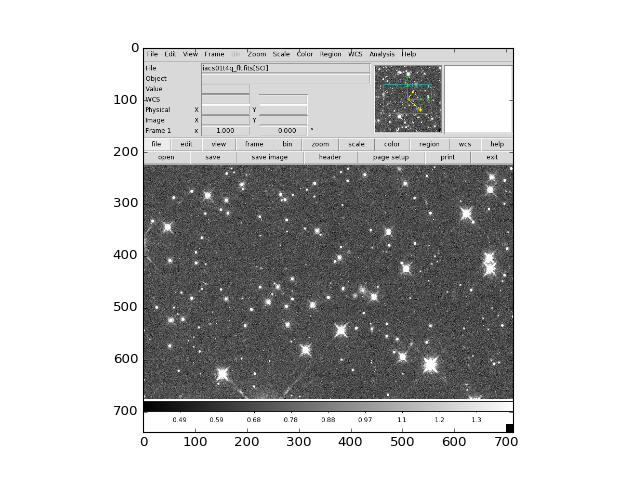

In [7]:
a.grab()

<h3>In order to interact directly with the DS9 window, we have to start up a loop which looks for mouse and keyboard press events. In order to get out of this loop, press the "q" key </h3>


Press 'q' to quit

2	make the next plot in a new window
a	aperture sum, with radius region_size 
b	return the gauss fit center of the object
c	return column plot
e	return a contour plot in a region around the cursor
g	return curve of growth plot
h	return a histogram in the region around the cursor
j	1D [gaussian|moffat] line fit 
k	1D [gaussian|moffat] column fit
l	return line plot
m	square region stats, in [region_size],default is median
r	return the radial profile plot
s	save current figure to disk as [plot_name]
w	display a surface plot around the cursor location
x	return x,y,value of pixel
y	return x,y,value of pixel

Current image /Users/sosey/test_images/iacs01t4q_flt.fits
pressed: e


<IPython.core.display.Javascript object>


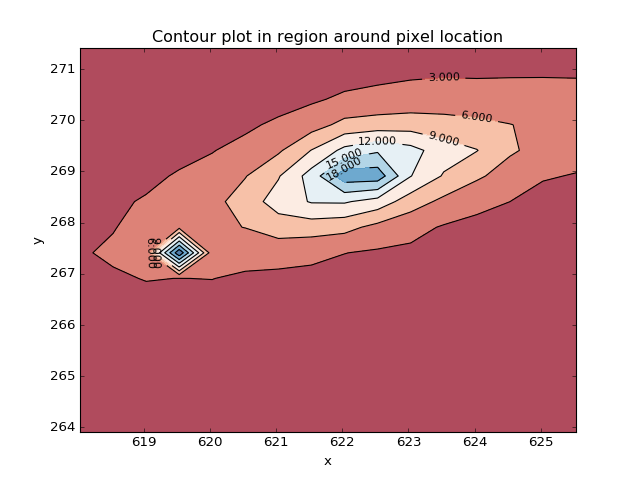

In [8]:
a.imexam() #start the interactive cursor in the DS9 window

In [9]:
# all of the plots are customizable; the parameters are stored in regular dictionaries
a.eimexam()

{'ceiling': [None, 'Maximum value to be contoured'],
 'cmap': ['RdBu', 'Colormap (matplotlib style) for image'],
 'floor': [None, 'Minimum value to be contoured'],
 'function': ['contour'],
 'label': [True, 'Label major contours with their values? [bool]'],
 'linestyle': ['--', 'matplotlib linestyle'],
 'ncolumns': [15, 'Number of columns'],
 'ncontours': [8, 'Number of contours to be drawn'],
 'nlines': [15, 'Number of lines'],
 'title': ['Contour plot in region around pixel location',
  'Title of the plot'],
 'xlabel': ['x', 'The string for the xaxis label'],
 'ylabel': ['y', 'The string for the yaxis label']}

In [10]:
#maybe we want to change the colormap on the DS9 display? You can see the available maps:
a.cmap()

['grey', 'red', 'green', 'red', 'blue', 'a', 'b', 'bb', 'he', 'i8', 'aips0', 'sls', 'hsv', 'heat', 'cool', 'rainbow', 'standard', 'staircase', 'color']


In [11]:
a.cmap(color='heat')

Image saved to /Users/sosey/test_images/iacs01t4q_flt.fits_snap.png


<IPython.core.display.Javascript object>


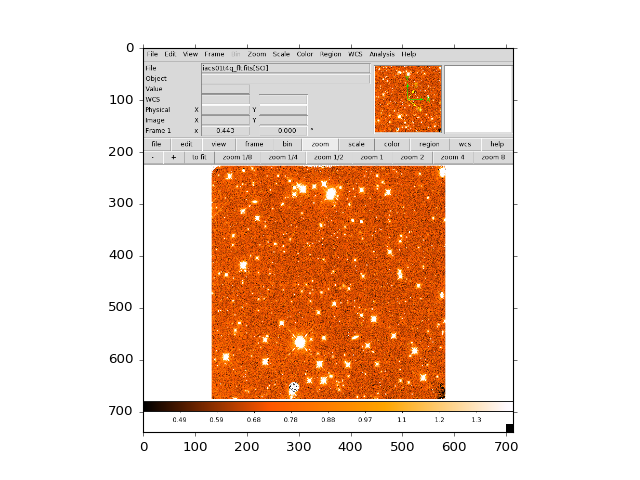

In [12]:
a.grab()

In [13]:
#You can access the plotting dictionaries directly for customization
a.exam.contour_pars['title'][0]='This is my favorite galaxy'
a.exam.contour_pars['ncontours'][0]=4
a.exam.contour_pars['cmap'][0]='YlOrRd' #see http://matplotlib.org/users/colormaps.html


Press 'q' to quit

2	make the next plot in a new window
a	aperture sum, with radius region_size 
b	return the gauss fit center of the object
c	return column plot
e	return a contour plot in a region around the cursor
g	return curve of growth plot
h	return a histogram in the region around the cursor
j	1D [gaussian|moffat] line fit 
k	1D [gaussian|moffat] column fit
l	return line plot
m	square region stats, in [region_size],default is median
r	return the radial profile plot
s	save current figure to disk as [plot_name]
w	display a surface plot around the cursor location
x	return x,y,value of pixel
y	return x,y,value of pixel

Current image /Users/sosey/test_images/iacs01t4q_flt.fits
pressed: e


<IPython.core.display.Javascript object>


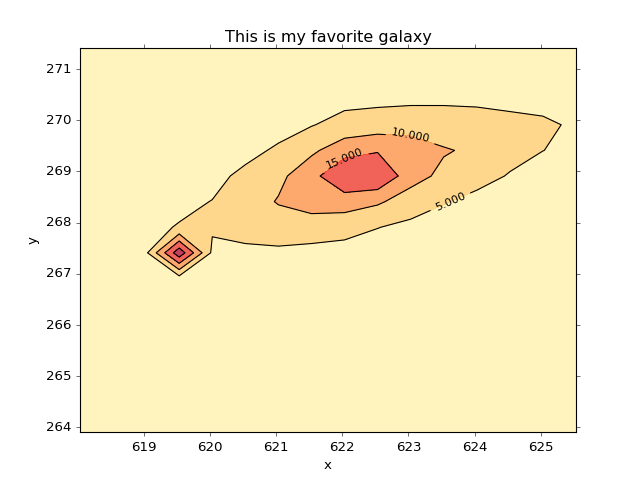

In [14]:
#lets see how the plot changed
a.imexam()

In [15]:
a.unlearn() #you can always go back to the default plot settings

<h3>If you want to pull the data array from the display and do some other calculations with it, you can ask for it: </h3>

In [16]:
data=a.get_data()

In [17]:
data

array([[  0.83070785,   0.77805561,   0.76478052, ...,   3.57433248,
          1.76538277,  13.27517891],
       [  0.81140989,   0.81358504,   0.82697475, ...,   0.93461889,
          6.13800716,   8.34170818],
       [  0.79158789,   0.64857799,   0.77130139, ...,   9.15612221,
          9.71294022,   5.86870718],
       ..., 
       [ 24.58002281,  14.42533588,  15.89180183, ...,  15.45005512,
         17.82489586,  20.00450897],
       [  0.60127252,  25.4940033 ,  17.80608749, ...,   7.73149157,
         25.98257256,  22.03309822],
       [ 10.51517963,  23.97153091,  20.60639   , ...,   1.63613272,
         11.7840147 ,  29.51210213]], dtype=float32)

In [18]:
#you can also get the header, which will be returned as a string
header=a.get_header()

In [19]:
print(header)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1014                                                  
NAXIS2  =                 1014                                                  
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            
DATE    = '2015-10-23' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'iacs01t4q        

<h3>Quick photometry can be pulled with the "a" key and uses the photutils package to do the work. More information on photutils can be found at http://photutils.readthedocs.org/en/latest/

You can also look at the example notebook with DS9 photometry which uses photutils

In [19]:
a.imexam()


Press 'q' to quit

2	make the next plot in a new window
a	aperture sum, with radius region_size 
b	return the gauss fit center of the object
c	return column plot
e	return a contour plot in a region around the cursor
g	return curve of growth plot
h	return a histogram in the region around the cursor
j	1D [gaussian|moffat] line fit 
k	1D [gaussian|moffat] column fit
l	return line plot
m	square region stats, in [region_size],default is median
r	return the radial profile plot
s	save current figure to disk as [plot_name]
w	display a surface plot around the cursor location
x	return x,y,value of pixel
y	return x,y,value of pixel

Current image /Users/sosey/test_images/iacs01t4q_flt.fits
pressed: a
xc=533.072556	yc=416.980522
x              y              radius         flux           mag(zpt=25.00) sky            fwhm
533.07         416.98         5              2483.29        16.51          0.76           -1.71


In [20]:
a.close()